#### Subgradient method

Subgradient method to minimize nondifferentiable convex function $f$

$$x^{k+1}=x^k-\alpha_k g^k, \,\, \alpha_k>0$$

* $g^k$ is any subgradient of $f$ at $x^k$
* it is `not` a descent method, we keep track of best point
$$f_{\text{best}}^k=\min_{i=1,\cdots, k}f(x^i)$$

Step size are fixed ahead of time, rather than using some sort of line search as in gradient methods

* $\alpha_k$ can be constant
* step length can be constant $\alpha_k=\gamma/\|g^k\|_2$, so $\|x^{k+1}-x^k\|_2=\gamma$
* square summable but not summable
$$\sum_{k=1}^{\infty}\alpha_k^2<\infty,\,\sum_{k=1}^{\infty}\alpha_k=\infty$$
* nonsummable diminishing (e.g., $\alpha_k=c/k$, etc.)
$$\lim_{k\rightarrow \infty}\alpha_k=0,\,\sum_{k=1}^{\infty}\alpha_k=\infty$$

#### Convergence analysis

To obtain bounds of

$$f_{\text{best}}^k-f(x^*)$$

for various choices of step size, where $x^*$ solves unconstrained optimization problem $\min f(x), f(x^*)=f^*$

Assumption on $f$

* convex, not necessarily smooth, not necessarily strongly convex
* subgradient `uniformly bounded`
$$\forall x, \forall g\in \partial f(x), \|g\|_2 \leq G, G>0$$
* $\|x^1-x^*\|_2\leq R$

For subgradient steps

$$x^{k+1}=x^k-\alpha_k g^k, \, g^k\in \partial f(x^k)$$

we start by writing the gap between $x^k$ and $x^*$

$$\begin{align*}
\|x^{k+1}-x^*\|_2^2 &= \|x^k-\alpha_k g^k-x^*\|_2^2 \\
& = \|x^k-x^*\|_2^2 -2\alpha_k \langle g^k, x^k-x^*\rangle +\alpha_k^2\|g^k\|_2^2 \\
& \left(f^*\geq f(x^k) + \langle g^k , x^*-x^k \rangle \Longrightarrow -\langle g^k , x^k-x^* \rangle \leq f^*-f(x^k)\right) \\
& \leq \|x^k-x^*\|_2^2 -2\alpha_k \left(f(x^k)-f^*\right) +\alpha_k^2\|g^k\|_2^2 \\
& \text{this shows when step size is small enough, we are making progress...} \\
& \text{apply the inequality recursively} \\
&\leq \|x^1-x^*\|_2^2-2\sum_{i=1}^k\alpha_i\left(f(x^i)-f^*\right)+\sum_{i=1}^k\alpha_i^2\|g^i\|_2^2 \\
& \text{rearrange using }\|x^{k+1}-x^*\|_2^2\geq 0,\, \|x^1-x^*\|_2\leq R \\
2\sum_{i=1}^k\alpha_i\left(f(x^i)-f^*\right) &\leq R^2+\sum_{i=1}^k\alpha_i^2\|g^i\|_2^2 \\
& \text{since }\sum_{i=1}^k\alpha_i\left(f(x^i)-f^*\right)\geq\left(\sum_{i=1}^k \alpha_i\right)(f_{\text{best}}^k-f^*)\\
f_{\text{best}}^k-f^* &\leq \left(R^2+\sum_{i=1}^k\alpha_i^2\|g^i\|_2^2\right)/\left(2\sum_{i=1}^k \alpha_i\right)\\
& \text{use }\|g^k\|_2 \leq G \\
&\leq \boxed{\left(R^2+G^2\sum_{i=1}^k\alpha_i^2\right)/\left(2\sum_{i=1}^k \alpha_i\right)}
\end{align*}$$

With this, we have the following

* constant step size $\alpha_k=\alpha$: converges to $G^2\alpha/2$
* constant step length $\alpha_k=\gamma/\|g^k\|_2$: converges to $G\gamma /2$
* square summable but not summable: converges to zero
* nonsummable diminishing: converges to zero

##### Bounded subgradient and Lipschitz continuous function

$\|g\|_2\leq G, G>0, \forall x,\forall g\in \partial f(x)$ implies $f$ is Lipschitz continuous with constant $G$

$$|f(x)-f(y)|\leq G\|x-y\|_2, \forall x, y$$

To see this, let $g_x\in \partial f(x), g_y\in \partial f(y)$, we have

$$g_x^T(x-y)\geq f(x)-f(y)\geq g_y^T(x-y)$$

with Cauchy-Schwarz ($\pm a^Tb\leq \|a\|_2\|b\|_2$), we have

$$G\|x-y\|_2\geq f(x)-f(y)\geq -G\|x-y\|_2$$

##### Optimal sequence

We can choose sequence of positive $\alpha_1, \cdots, \alpha_k$ such that

$$\left(R^2+G^2\sum_{i=1}^k\alpha_i^2\right)/\left(2\sum_{i=1}^k \alpha_i\right)$$

is minimized

First, note that it is a convex function itself (quadratic over linear), and we can permute $\alpha_i$ and the function value does not change

Then, we apply all possible permutation to one optimal sequence $\alpha^*$, and use Jensen's inequality

$$f(\mathbb{E}[\alpha])\leq \mathbb{E}[f(\alpha)]$$

the right hand size would be just $f^*$ (since permutation does not change function value), while $\mathbb{E}[\alpha]$ (over all possible permutation) would be a sequence with identical $\alpha_i$ and $f(\mathbb{E}[\alpha])$ must also be $f^*$

Therefore, we can see that all $\alpha_i$ must be equal in the optimal sequence

We can then write the bound as

$$\frac{R^2+G^2k\alpha^2}{2k\alpha}$$

Take derivative and set it to zero, we get optimal `step size`

$$\alpha=(R/G)/\sqrt{k}$$

Plug it back, we have `convergence rate`

$$f_{\text{best}}^k-f^*\leq RG/\sqrt{k}\sim \frac{1}{\sqrt{k}}$$

and number of `steps` required to achieve

$$\frac{R^2+G^2k\alpha^2}{2k\alpha}\leq \epsilon$$

is

$$k=\left(\frac{RG}{\epsilon}\right)^2\sim \left(\frac{1}{\epsilon}\right)^2$$

#### A stopping criterion

Previously, we have

$$2\sum_{i=1}^k\alpha_i\left(f(x^i)-f^*\right) \leq R^2+\sum_{i=1}^k\alpha_i^2\|g^i\|_2^2$$

Rearrange and we have a lower bound

$$f^*\geq l^k=\left(2\sum_{i=1}^k\alpha_if(x^i)-R^2-\sum_{i=1}^k\alpha_i^2\|g^i\|_2^2\right)/\left(2\sum_{i=1}^k\alpha_i\right)$$

and we can terminate when $f_{\text{best}}^k-l_{\text{best}}^k$ is smaller than some threshold

However, due to being slow in going to zero and the difficulty to justify $R$ value, subgradient method is often used without any formal stopping criterion

#### Piecewise linear minimization

$$\min f(x)=\max_{i=1,\cdots, m}(a_i^Tx+b_i)$$

To find a subgradient, we first find index $j$ such that

$$a_j^T+b_j=\max_{i=1, \cdots, m}(a_i^Tx+b_i)$$

Then, we take $g=a_j$ and run subgradient steps

$$x^{k+1}=x^k-\alpha_ka_j$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import time
np.set_printoptions(formatter={'float': '{: 0.4f}'.format})

plt.style.use('dark_background')
# color: https://matplotlib.org/stable/gallery/color/named_colors.htm

In [ ]:
def subgrad_pwl(A, b, x1, R=0, gamma=0, a=0, tol=1e-3, n_iter=3000, const=True, dim=False):
    # piecewise linear minimization

    f = [np.inf]
    f_best = [np.inf]
    lb_best = [-np.inf]
    sum_alpha = 0
    sum_alpha_f = 0
    sum_alpha_subgrad = 0
    x = x1.copy()

    for k in range(1, n_iter+1):
        f_vals = A @ x + b
        f_val = np.max(f_vals)
        idx_max = np.argmax(f_vals)
        subgrad = A[idx_max, :]

        # Step size
        if const:
            alpha = gamma / (np.linalg.norm(subgrad) + 1e-10)
        else:
            if dim:
                alpha = a / np.sqrt(k)
            else:
                alpha = a / k

        f.append(f_val)
        f_best.append(min(f_val, f_best[-1]))

        # Lower bound
        sum_alpha += alpha
        sum_alpha_f += alpha * f_val
        sum_alpha_subgrad += alpha**2 * np.linalg.norm(subgrad)**2

        lb = (2 * sum_alpha_f - R**2 - sum_alpha_subgrad) / (2 * sum_alpha)
        lb_best.append(max(lb, lb_best[-1]))

        if f_best[-1] - lb_best[-1] < tol:
            break

        # Subgradient step
        x = x - alpha * subgrad

    hist = {'f': f, 'f_best': f_best, 'lb_best': lb_best}

    return x, hist

In [ ]:
np.random.seed(42)
n = 20  # size of x
m = 100
A = np.random.randn(m, n)
b = np.random.randn(m)

# Get optimal value using CVXPY
x_var = cp.Variable(n)
objective = cp.Minimize(cp.max(A @ x_var + b))
problem = cp.Problem(objective)
problem.solve()

f_min = problem.value

True R: 0.9653
Optimal f (CVXPY) 0.9542
optimal f (const len): 0.9935, 0.9666, 0.9756
optimal f (sqrsum nonsum): 1.0941, 0.9793, 0.9675
optimal f (nonsum dim): 0.9619, 1.0229, 1.6160


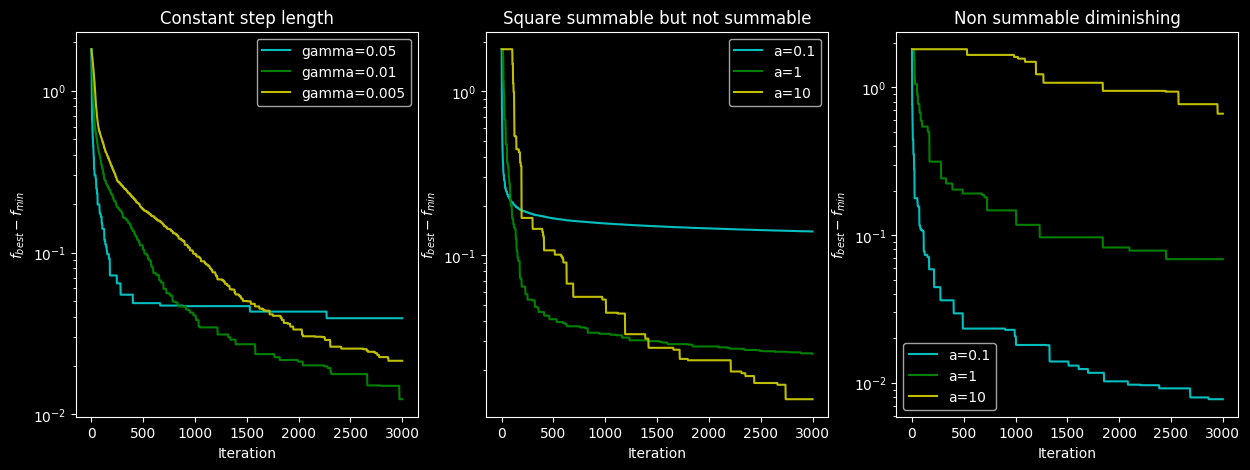

In [ ]:
x1 = np.zeros(n)
Rtrue = np.linalg.norm(x1 - x_var.value)
print(f"True R: {Rtrue:.4f}")
print(f"Optimal f (CVXPY) {f_min:.4f}")
R = 5  # Use a larger heuristic R
tol = 1e-3
n_iter = 3000
a = [0.1, 1, 10]
gammas = [0.05, 0.01, 0.005]
iters = np.arange(1, n_iter + 1)

x1_hist, hist1 = subgrad_pwl(A, b, x1, R=R, gamma=gammas[0], tol=tol, n_iter=n_iter)
x2_hist, hist2 = subgrad_pwl(A, b, x1, R=R, gamma=gammas[1], tol=tol, n_iter=n_iter)
x3_hist, hist3 = subgrad_pwl(A, b, x1, R=R, gamma=gammas[2], tol=tol, n_iter=n_iter)
print(f"optimal f (const len): {hist1['f_best'][-1]:.4f}, {hist2['f_best'][-1]:.4f}, {hist3['f_best'][-1]:.4f}")

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].semilogy(iters, np.array(hist1['f_best'][1:]) - f_min, 'c-', label=f'gamma={gammas[0]}')
ax[0].semilogy(iters, np.array(hist2['f_best'][1:]) - f_min, 'g-', label=f'gamma={gammas[1]}')
ax[0].semilogy(iters, np.array(hist3['f_best'][1:]) - f_min, 'y-', label=f'gamma={gammas[2]}')
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('$f_{best} - f_{min}$')
ax[0].set_title('Constant step length')
ax[0].legend()

x1_hist, hist1 = subgrad_pwl(A, b, x1, R=R, a=a[0], tol=tol, n_iter=n_iter, const=False, dim=False)
x2_hist, hist2 = subgrad_pwl(A, b, x1, R=R, a=a[1], tol=tol, n_iter=n_iter, const=False, dim=False)
x3_hist, hist3 = subgrad_pwl(A, b, x1, R=R, a=a[2], tol=tol, n_iter=n_iter, const=False, dim=False)
print(f"optimal f (sqrsum nonsum): {hist1['f_best'][-1]:.4f}, {hist2['f_best'][-1]:.4f}, {hist3['f_best'][-1]:.4f}")

ax[1].semilogy(iters, np.array(hist1['f_best'][1:]) - f_min, 'c-', label=f'a={a[0]}')
ax[1].semilogy(iters, np.array(hist2['f_best'][1:]) - f_min, 'g-', label=f'a={a[1]}')
ax[1].semilogy(iters, np.array(hist3['f_best'][1:]) - f_min, 'y-', label=f'a={a[2]}')
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('$f_{best} - f_{min}$')
ax[1].set_title('Square summable but not summable')
ax[1].legend()

x1_hist, hist1 = subgrad_pwl(A, b, x1, R=R, a=a[0], tol=tol, n_iter=n_iter, const=False, dim=True)
x2_hist, hist2 = subgrad_pwl(A, b, x1, R=R, a=a[1], tol=tol, n_iter=n_iter, const=False, dim=True)
x3_hist, hist3 = subgrad_pwl(A, b, x1, R=R, a=a[2], tol=tol, n_iter=n_iter, const=False, dim=True)
print(f"optimal f (nonsum dim): {hist1['f_best'][-1]:.4f}, {hist2['f_best'][-1]:.4f}, {hist3['f_best'][-1]:.4f}")

ax[2].semilogy(iters, np.array(hist1['f_best'][1:]) - f_min, 'c-', label=f'a={a[0]}')
ax[2].semilogy(iters, np.array(hist2['f_best'][1:]) - f_min, 'g-', label=f'a={a[1]}')
ax[2].semilogy(iters, np.array(hist3['f_best'][1:]) - f_min, 'y-', label=f'a={a[2]}')
ax[2].set_xlabel('Iteration')
ax[2].set_ylabel('$f_{best} - f_{min}$')
ax[2].set_title('Non summable diminishing')
ax[2].legend()

plt.show()

#### Simple 1-norm minimization

We want to

$$\min \|Ax-b\|_1$$

Using affine transformation rule with $f(x)=g(Ax-b)$ and $g(y)=\|y\|_1$, we have

$$\partial f(x)=A^T\partial g(y)|_{y=Ax-b}$$

Since for a vector $y$, each component $v_i$ in subdifferential of $\partial \|y\|_1$ is

$$v_i=\left\{\begin{array}{ll} \text{sgn}(y_i) & y_i \neq0 \\ [-1, 1] & y_i=0\end{array}\right.$$

therefore, we can choose subgradient as

$$g=A^T\text{sgn}(Ax-b)$$

In [ ]:
def subgrad_l1(A, b, x1, R=0, gamma=0, a=0, tol=1e-3, n_iter=3000, const=True, dim=False):
    # simple l1 minimization

    f = [np.inf]
    f_best = [np.inf]
    lb_best = [-np.inf]
    sum_alpha = 0
    sum_alpha_f = 0
    sum_alpha_subgrad = 0
    x = x1.copy()

    for k in range(1, n_iter+1):
        subgrad = A.T @ np.sign(A @ x - b)
        f_val = np.linalg.norm(A @ x - b, ord=1)

        # Step size
        if const:
            alpha = gamma / (np.linalg.norm(subgrad) + 1e-10)
        else:
            if dim:
                alpha = a / np.sqrt(k)
            else:
                alpha = a / k

        f.append(f_val)
        f_best.append(min(f_val, f_best[-1]))

        # Lower bound
        sum_alpha += alpha
        sum_alpha_f += alpha * f_val
        sum_alpha_subgrad += alpha**2 * np.linalg.norm(subgrad)**2

        lb = (2 * sum_alpha_f - R**2 - sum_alpha_subgrad) / (2 * sum_alpha)
        lb_best.append(max(lb, lb_best[-1]))

        if f_best[-1] - lb_best[-1] < tol:
            break

        # Subgradient step
        x = x - alpha * subgrad

    hist = {'f': f, 'f_best': f_best, 'lb_best': lb_best}

    return x, hist

In [ ]:
np.random.seed(42)
n = 100  # size of x
m = 500
A = np.random.randn(m, n)
b = np.random.randn(m)

# Get optimal value using CVXPY
x_var = cp.Variable(n)
objective = cp.Minimize(cp.norm(A @ x_var - b, 1))
problem = cp.Problem(objective)
problem.solve()

f_min = problem.value

True R: 0.6747
Optimal f (CVXPY) 318.2521
optimal f (const len): 345.2437, 318.4518, 318.6229
optimal f (sqrsum nonsum): 363.2185, 321.4218, 318.2846
optimal f (nonsum dim): 320.1845, 318.3267, 318.9816


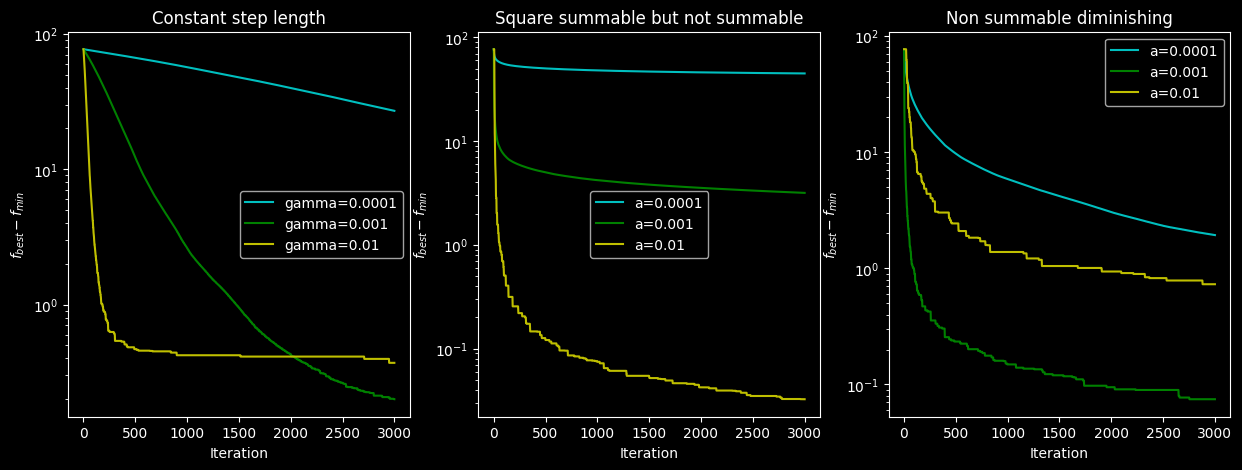

In [ ]:
x1 = np.zeros(n)
Rtrue = np.linalg.norm(x1 - x_var.value)
print(f"True R: {Rtrue:.4f}")
print(f"Optimal f (CVXPY) {f_min:.4f}")
R = 5  # Use a larger heuristic R
tol = 1e-3
n_iter = 3000
a = [1e-4, 1e-3, 1e-2]
gammas = [1e-4, 1e-3, 1e-2]
iters = np.arange(1, n_iter + 1)

x1_hist, hist1 = subgrad_l1(A, b, x1, R=R, gamma=gammas[0], tol=tol, n_iter=n_iter)
x2_hist, hist2 = subgrad_l1(A, b, x1, R=R, gamma=gammas[1], tol=tol, n_iter=n_iter)
x3_hist, hist3 = subgrad_l1(A, b, x1, R=R, gamma=gammas[2], tol=tol, n_iter=n_iter)
print(f"optimal f (const len): {hist1['f_best'][-1]:.4f}, {hist2['f_best'][-1]:.4f}, {hist3['f_best'][-1]:.4f}")

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].semilogy(iters, np.array(hist1['f_best'][1:]) - f_min, 'c-', label=f'gamma={gammas[0]}')
ax[0].semilogy(iters, np.array(hist2['f_best'][1:]) - f_min, 'g-', label=f'gamma={gammas[1]}')
ax[0].semilogy(iters, np.array(hist3['f_best'][1:]) - f_min, 'y-', label=f'gamma={gammas[2]}')
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('$f_{best} - f_{min}$')
ax[0].set_title('Constant step length')
ax[0].legend()

x1_hist, hist1 = subgrad_l1(A, b, x1, R=R, a=a[0], tol=tol, n_iter=n_iter, const=False, dim=False)
x2_hist, hist2 = subgrad_l1(A, b, x1, R=R, a=a[1], tol=tol, n_iter=n_iter, const=False, dim=False)
x3_hist, hist3 = subgrad_l1(A, b, x1, R=R, a=a[2], tol=tol, n_iter=n_iter, const=False, dim=False)
print(f"optimal f (sqrsum nonsum): {hist1['f_best'][-1]:.4f}, {hist2['f_best'][-1]:.4f}, {hist3['f_best'][-1]:.4f}")

ax[1].semilogy(iters, np.array(hist1['f_best'][1:]) - f_min, 'c-', label=f'a={a[0]}')
ax[1].semilogy(iters, np.array(hist2['f_best'][1:]) - f_min, 'g-', label=f'a={a[1]}')
ax[1].semilogy(iters, np.array(hist3['f_best'][1:]) - f_min, 'y-', label=f'a={a[2]}')
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('$f_{best} - f_{min}$')
ax[1].set_title('Square summable but not summable')
ax[1].legend()

x1_hist, hist1 = subgrad_l1(A, b, x1, R=R, a=a[0], tol=tol, n_iter=n_iter, const=False, dim=True)
x2_hist, hist2 = subgrad_l1(A, b, x1, R=R, a=a[1], tol=tol, n_iter=n_iter, const=False, dim=True)
x3_hist, hist3 = subgrad_l1(A, b, x1, R=R, a=a[2], tol=tol, n_iter=n_iter, const=False, dim=True)
print(f"optimal f (nonsum dim): {hist1['f_best'][-1]:.4f}, {hist2['f_best'][-1]:.4f}, {hist3['f_best'][-1]:.4f}")

ax[2].semilogy(iters, np.array(hist1['f_best'][1:]) - f_min, 'c-', label=f'a={a[0]}')
ax[2].semilogy(iters, np.array(hist2['f_best'][1:]) - f_min, 'g-', label=f'a={a[1]}')
ax[2].semilogy(iters, np.array(hist3['f_best'][1:]) - f_min, 'y-', label=f'a={a[2]}')
ax[2].set_xlabel('Iteration')
ax[2].set_ylabel('$f_{best} - f_{min}$')
ax[2].set_title('Non summable diminishing')
ax[2].legend()

plt.show()

#### 1-norm regularized least squares

$$\min \frac{1}{2}\|Ax-b\|_2^2+\lambda\|x\|_1$$

and we can choose the subgradient

$$g=A^T(Ax-b)+\lambda \text{sgn}(x)$$

In [ ]:
def subgrad_l1_ls(A, b, x1, lamb=0.5, R=0, gamma=0, a=0, tol=1e-3, n_iter=3000, const=True, dim=False):
    # l1-regularized least squares

    f = [np.inf]
    f_best = [np.inf]
    lb_best = [-np.inf]
    sum_alpha = 0
    sum_alpha_f = 0
    sum_alpha_subgrad = 0
    x = x1.copy()

    for k in range(1, n_iter+1):
        subgrad = A.T @ (A @ x - b) + lamb * np.sign(x)
        f_val = 0.5 * np.linalg.norm(A @ x - b)**2 + lamb * np.linalg.norm(x, ord=1)

        # Step size
        if const:
            alpha = gamma / (np.linalg.norm(subgrad) + 1e-10)
        else:
            if dim:
                alpha = a / np.sqrt(k)
            else:
                alpha = a / k

        f.append(f_val)
        f_best.append(min(f_val, f_best[-1]))

        # Lower bound
        sum_alpha += alpha
        sum_alpha_f += alpha * f_val
        sum_alpha_subgrad += alpha**2 * np.linalg.norm(subgrad)**2

        lb = (2 * sum_alpha_f - R**2 - sum_alpha_subgrad) / (2 * sum_alpha)
        lb_best.append(max(lb, lb_best[-1]))

        if f_best[-1] - lb_best[-1] < tol:
            break

        # Subgradient step
        x = x - alpha * subgrad

    hist = {'f': f, 'f_best': f_best, 'lb_best': lb_best}

    return x, hist

In [ ]:
np.random.seed(42)
n = 500  # size of x
m = 100
lamb = 0.5
A = np.random.randn(m, n)
b = np.random.randn(m)

# Get optimal value using CVXPY
x_var = cp.Variable(n)
objective = cp.Minimize(0.5 * cp.norm(A @ x_var - b)**2 + lamb * cp.norm(x_var, 1))
problem = cp.Problem(objective)
problem.solve()

f_min = problem.value

True R: 0.8031
Optimal value (CVXPY) 3.1999
optimal f (const len): 47.6873, 11.8183, 3.3209
optimal f (sqrsum nonsum): 50.0599, 27.1993, 4.5481
optimal f (nonsum dim): 23.5202, 4.3640, 3.5508


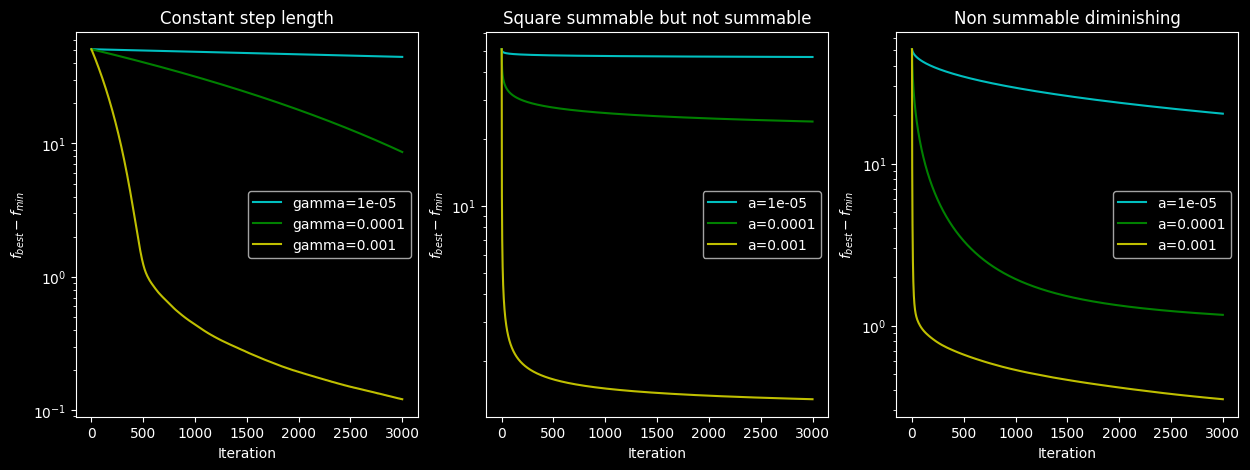

In [ ]:
x1 = np.zeros(n)
Rtrue = np.linalg.norm(x1 - x_var.value)
print(f"True R: {Rtrue:.4f}")
print(f"Optimal value (CVXPY) {f_min:.4f}")
R = 5  # Use a larger heuristic R
tol = 1e-3
n_iter = 3000
a = [1e-5, 1e-4, 1e-3]
gammas = [1e-5, 1e-4, 1e-3]
iters = np.arange(1, n_iter + 1)

x1_hist, hist1 = subgrad_l1_ls(A, b, x1, lamb=lamb, R=R, gamma=gammas[0], tol=tol, n_iter=n_iter)
x2_hist, hist2 = subgrad_l1_ls(A, b, x1, lamb=lamb, R=R, gamma=gammas[1], tol=tol, n_iter=n_iter)
x3_hist, hist3 = subgrad_l1_ls(A, b, x1, lamb=lamb, R=R, gamma=gammas[2], tol=tol, n_iter=n_iter)
print(f"optimal f (const len): {hist1['f_best'][-1]:.4f}, {hist2['f_best'][-1]:.4f}, {hist3['f_best'][-1]:.4f}")

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].semilogy(iters, np.array(hist1['f_best'][1:]) - f_min, 'c-', label=f'gamma={gammas[0]}')
ax[0].semilogy(iters, np.array(hist2['f_best'][1:]) - f_min, 'g-', label=f'gamma={gammas[1]}')
ax[0].semilogy(iters, np.array(hist3['f_best'][1:]) - f_min, 'y-', label=f'gamma={gammas[2]}')
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('$f_{best} - f_{min}$')
ax[0].set_title('Constant step length')
ax[0].legend()

x1_hist, hist1 = subgrad_l1_ls(A, b, x1, lamb=lamb, R=R, a=a[0], tol=tol, n_iter=n_iter, const=False, dim=False)
x2_hist, hist2 = subgrad_l1_ls(A, b, x1, lamb=lamb, R=R, a=a[1], tol=tol, n_iter=n_iter, const=False, dim=False)
x3_hist, hist3 = subgrad_l1_ls(A, b, x1, lamb=lamb, R=R, a=a[2], tol=tol, n_iter=n_iter, const=False, dim=False)
print(f"optimal f (sqrsum nonsum): {hist1['f_best'][-1]:.4f}, {hist2['f_best'][-1]:.4f}, {hist3['f_best'][-1]:.4f}")

ax[1].semilogy(iters, np.array(hist1['f_best'][1:]) - f_min, 'c-', label=f'a={a[0]}')
ax[1].semilogy(iters, np.array(hist2['f_best'][1:]) - f_min, 'g-', label=f'a={a[1]}')
ax[1].semilogy(iters, np.array(hist3['f_best'][1:]) - f_min, 'y-', label=f'a={a[2]}')
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('$f_{best} - f_{min}$')
ax[1].set_title('Square summable but not summable')
ax[1].legend()

x1_hist, hist1 = subgrad_l1_ls(A, b, x1, lamb=lamb, R=R, a=a[0], tol=tol, n_iter=n_iter, const=False, dim=True)
x2_hist, hist2 = subgrad_l1_ls(A, b, x1, lamb=lamb, R=R, a=a[1], tol=tol, n_iter=n_iter, const=False, dim=True)
x3_hist, hist3 = subgrad_l1_ls(A, b, x1, lamb=lamb, R=R, a=a[2], tol=tol, n_iter=n_iter, const=False, dim=True)
print(f"optimal f (nonsum dim): {hist1['f_best'][-1]:.4f}, {hist2['f_best'][-1]:.4f}, {hist3['f_best'][-1]:.4f}")

ax[2].semilogy(iters, np.array(hist1['f_best'][1:]) - f_min, 'c-', label=f'a={a[0]}')
ax[2].semilogy(iters, np.array(hist2['f_best'][1:]) - f_min, 'g-', label=f'a={a[1]}')
ax[2].semilogy(iters, np.array(hist3['f_best'][1:]) - f_min, 'y-', label=f'a={a[2]}')
ax[2].set_xlabel('Iteration')
ax[2].set_ylabel('$f_{best} - f_{min}$')
ax[2].set_title('Non summable diminishing')
ax[2].legend()

plt.show()

#### Optimal step with known optimal function value

Recall when analyzing convergence of subgradient method, we have

$$\begin{align*}
\|x^{k+1}-x^*\|_2^2 \leq \|x^k-x^*\|_2^2 -2\alpha_k \left(f(x^k)-f^*\right) +\alpha_k^2\|g^k\|_2^2
\end{align*}$$

If we minimize the right hand side with known $f^*$, we get the optimal step as

$$\alpha_k=\frac{f(x^k)-f^*}{\|g^k\|_2^2}$$

Plug it back and we have

$$\|x^{k+1}-x^*\|_2^2 \leq \|x^k-x^*\|_2^2 -\frac{(f(x^k)-f^*)^2}{\|g^k\|_2^2}$$

meaning that distance to $x^*$ decreases at each step

Apply recursively and since $\|x^{k+1}-x^*\|_2^2\geq 0$, we have

$$\sum_{i=1}^k\frac{(f(x^k)-f^*)^2}{\|g^k\|_2^2}\leq R^2$$

or

$$\sum_{i=1}^k(f(x^k)-f^*)^2\leq R^2G^2$$

##### Find point in intersection of convex sets

We want to find a point in the intersection of $m$ closed convex sets $C_1,\cdots, C_m$

$$\min f(x)=\max\{f_1(x), \cdots, f_m(x)\}$$

where $f_j(x)=\inf_{y\in C_j}\|x-y\|_2$

* If the intersection is nonempty, then we know that $f^*=0$
* $g\in \partial f(\hat{x})$ if $g\in \partial f_j(\hat{x}), f(\hat{x})=f_j(\hat{x})$, that is, $C_j$ is the farthest set from $\hat{x}$ (weak result in pointwise maximum)
* subgradient follows projection
    * if $\hat{x}\in C_j$, $g=0$
    * if $\hat{x}\notin C_j$, $g=\left(\hat{x}-P_j(\hat{x})\right)/\|\hat{x}-P_j(\hat{x})\|_2$ and $\|g\|_2=1$

If $f^*=0$, then the optimal step becomes

$$\alpha_k=\frac{f(x^k)}{\|g^k\|_2^2}=f(x^k)$$

At iteration $k$ in subgradient method, we find farthest set $C_j$ with $f(x^k)=f_j(x^k)$ and

$$\begin{align*}x^{k+1}&=x^k-f(x^k)\left(x_k-P_j(x^k)\right)/\|\hat{x}-P_j(\hat{x})\|_2 \\
& \|\hat{x}-P_j(\hat{x})\|_2 = f_j(x^k) \\
&=x^k-f(x^k)\left(x_k-P_j(x^k)\right)/f_j(x^k) \\
&=P_j(x^k)
\end{align*}$$

That is, at each step, we `project` current $x^k$ onto the farthest set

##### PSD matrix completion

Some entries of a PSD matrix is fixed, the goal is to find values for others to complete the PSD

$C_1=S^n_+$, and $C_2\in S^n$ is symmetric matrix set with specified fixed entries

We can do projection onto $C_1$ by eigendecomposition and truncation, and projection onto $C_2$ by resetting specified entries

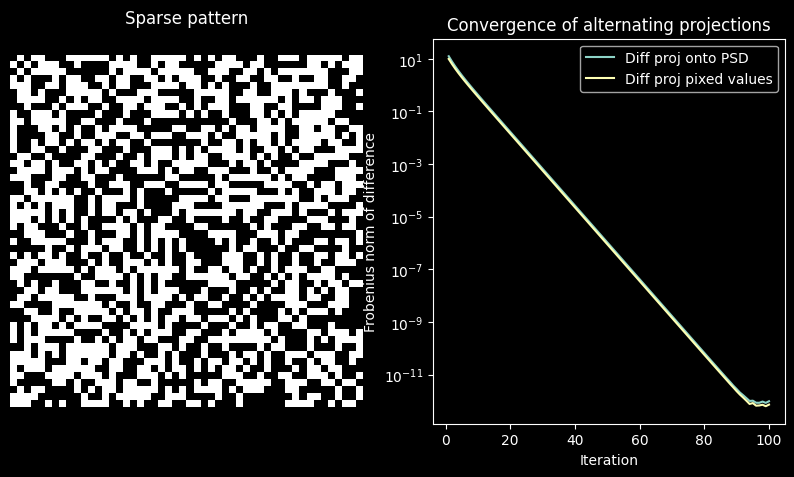

In [ ]:
n = 50  # matrix dim

np.random.seed(42)
A_0 = np.random.randn(n, n)
A = A_0.T @ A_0 # make it PSD

np.random.seed(41)
S = np.random.rand(n, n)
S = (S + S.T + np.eye(n)) > 1 # mask (not apply to diagonal)
# roughly half entries will be zero

A = A * S # mask out matrix
# returns a tuple of arrays, one for each dimension
# indicating the indices where the condition is true
idx = np.where(A != 0)
non_zero_entries = A[idx] # creates a 1D array of all nonzero elements in A

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].spy(S)
ax[0].axis('off')
ax[0].set_title('Sparse pattern')

diff_1 = []
diff_2 = []
n_iter = 100
for k in range(n_iter):

    # Project onto PSD
    eigvals, eigvecs = np.linalg.eigh(A)
    eigvals[eigvals < 0] = 0
    A_proj = eigvecs @ np.diag(eigvals) @ eigvecs.T
    diff_1.append(np.linalg.norm(A_proj - A, 'fro'))
    A = A_proj.copy()

    # Project onto fixed values
    A[idx] = non_zero_entries
    diff_2.append(np.linalg.norm(A_proj - A, 'fro'))

ax[1].semilogy(range(1, n_iter+1), diff_1, label="Diff proj onto PSD")
ax[1].semilogy(range(1, n_iter+1), diff_2, label="Diff proj pixed values")
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('Frobenius norm of difference')
ax[1].set_title('Convergence of alternating projections')
ax[1].legend()
plt.show()